# **Codveda Technologies Internship For ML**

# Task 3: Implement K-Nearest Neighbors (KNN) Classifier

**Intern**-MD.Rakibul Hossain

**Dataset**-Iris.csv

**Objectives**:

* Train a KNN model on a labeled dataset.
* Evaluate the performance using accuracy, confusion
matrix, and precision/recall.
* Use different values of K and compare the results.
* Tools: Python, scikit-learn, pandas.

**Description**: Build a KNN classifier to classify data
points into categories.


---




# 1. Drive Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2.Import the relevant libraries

In [ ]:
#python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split #Model
from sklearn.preprocessing import StandardScaler #Preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score,recall_score,f1_score #Evaluate


# 3.Load Dataset

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Mine/IT/iris.csv")

# 4.Head of dataset

In [ ]:
df.head()

,Id,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# 5.Drop the column 'ID'

In [ ]:
# Drooping Id
df.drop(columns=['Id'],inplace=True)

In [ ]:
df.head()

,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


* Drop column 'ID' cause it's not important

# 6.Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SepalLength[cm]  150 non-null    float64
 1   SepalWidth[cm]   150 non-null    float64
 2   PetalLength[cm]  150 non-null    float64
 3   PetalWidth[cm]   150 non-null    float64
 4   Species          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# 7.Describe the Dataset

In [ ]:
df.describe()

,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm]
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 8.Shape of dataset

In [ ]:
df.shape

(150, 5)

# 9.Check Null Values of Dataset

In [ ]:
df.isnull().sum()

,0
SepalLength[cm],0
SepalWidth[cm],0
PetalLength[cm],0
PetalWidth[cm],0
Species,0


* Here is no null values

# 10.Check Duplicate Values of Dataset

In [ ]:
df.duplicated().sum()

np.int64(3)

* Here is three duplicate values

# 11.Categorical Columns Of Data

In [ ]:
# Printing Columns That Have Dtype is Object or categorical.
object_columns = df.select_dtypes(include=['object']).columns
print(f'The Following Columns Have Dtype as Object \n: {object_columns}')
print(f'The Value Count of Categorical Columns is : {object_columns.value_counts().sum()}')

The Following Columns Have Dtype as Object 
: Index(['Species'], dtype='object')
The Value Count of Categorical Columns is : 1


# 12.Numerical Columns Of Data

In [ ]:
# Printing Columns That Have Dtype is FLoat or int
float_columns = df.select_dtypes(include=['float','int']).columns
print(f'The Following Columns Have Dtype as Float and int :\n{float_columns}')
print(f'The Value Count of Float Columns is : {float_columns.value_counts().sum()}')

The Following Columns Have Dtype as Float and int :
Index(['SepalLength[cm]', 'SepalWidth[cm]', 'PetalLength[cm]',
       'PetalWidth[cm]'],
      dtype='object')
The Value Count of Float Columns is : 4


# 13.Model Building

In [ ]:
def evaluate_results(y_test, y_pred):
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    return accuracy, precision, recall, f1

# 14.K-Nearest Neighbors (KNN)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


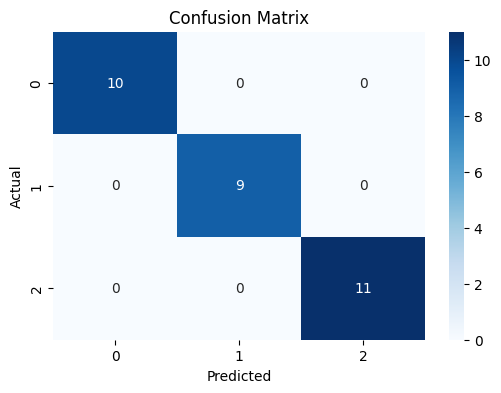

In [ ]:
# Split the data into features (X) and target (y)
X = df.drop(columns='Species')
y = df['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_classifier.predict(X_test)

#Evaluate
accuracy_knn = evaluate_results(y_test, y_pred_knn)

# 15.Data Scaling

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 16. Train KNN and Evaluate

In [ ]:
def evaluate_knn(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    return acc, cm, report


# 17.Try Different Values of K

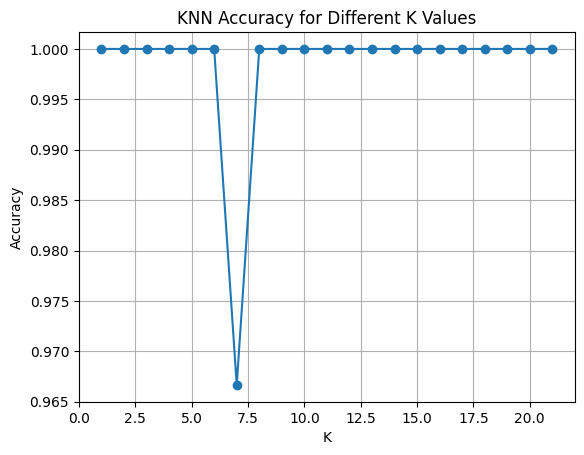

In [ ]:
k_values = range(1, 22)
accuracies = []

for k in k_values:
    acc, _, _ = evaluate_knn(k)
    accuracies.append(acc)

# Plot accuracy vs K
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Accuracy for Different K Values')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


# 18.Final Evaluation for Best K

In [ ]:
best_k = k_values[np.argmax(accuracies)]
final_acc, final_cm, final_report = evaluate_knn(best_k)

print(f"Best K: {best_k}")
print(f"Accuracy: {final_acc:.2f}")
print("Confusion Matrix:")
print(final_cm)
print("Classification Report:")
print(pd.DataFrame(final_report).transpose())


Best K: 1
Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                 precision  recall  f1-score  support
Iris-setosa            1.0     1.0       1.0     10.0
Iris-versicolor        1.0     1.0       1.0      9.0
Iris-virginica         1.0     1.0       1.0     11.0
accuracy               1.0     1.0       1.0      1.0
macro avg              1.0     1.0       1.0     30.0
weighted avg           1.0     1.0       1.0     30.0


**Conclusion**

In this task, we

Explored the Iris dataset Selected KNN Classifier Model and it's performance too good.The accuracy of the KNN classifier depends heavily on the value of K.